# Isomorfismo de Grafos

Dos grafos $G=(V,E)$ y $G'=(V',E')$ son \textbf{isomorfos} si existen dos biyecciones $f_v:V\mapsto V'$ y $f_e:E\mapsto E'$, entre sus v\'ertices como y sus aristas respectivamente, tal que para cualquier elemento $v$ y $w$ pertenecientes a $V$ tenemos:

$\{v,w\} \in E \iff \{f_v(v),f_v(w)\} \in E'$

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G1=nx.Graph()
G1.add_edges_from([(1,3),(1,4),(2,3),(2,4),(3,1),(4,1),(4,2),(5,2),(5,3)])
nx.draw(G1)
plt.figure()
plt.show()
M1=nx.adjacency_matrix(G1).todense()
print M1

G2=nx.Graph()
G2.add_edges_from([(1,3),(1,4),(2,3),(2,4),(3,1),(4,1),(4,2),(5,2),(5,3)])
nx.draw(G2)
plt.figure()
plt.show()
M2=nx.adjacency_matrix(G2).todense()
print M2

[[0 0 1 1 0]
 [0 0 1 1 1]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [0 1 1 0 0]]


[[0 0 1 1 0]
 [0 0 1 1 1]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [0 1 1 0 0]]


Dos grafos $G=(V,E)$ y $G'=(V',E')$ son isomorfos si y solo si existe una matriz de permutación $P$ y alg\'un orden de sus vértices, tal que sus matrices de adyacencia $A(G)$ y $A(G')$ son iguales.

$A(G)=P \times A(G')\times P^T$

In [2]:
P=np.identity(5)
print P

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


In [3]:
print np.equal(M1,(P.dot(M2)).dot(P.T))

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [4]:
nx.is_isomorphic(G1,G2)

True

In [5]:
P2=np.random.permutation(P)
print P2

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.]]


In [6]:
M3=(P2.dot(M2)).dot(P2.T)
print M3
print M2

[[ 0.  0.  1.  1.  0.]
 [ 0.  0.  1.  1.  1.]
 [ 1.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.]
 [ 0.  1.  0.  1.  0.]]
[[0 0 1 1 0]
 [0 0 1 1 1]
 [1 1 0 0 1]
 [1 1 0 0 0]
 [0 1 1 0 0]]


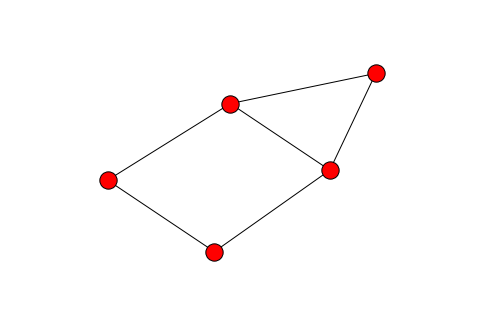

In [7]:
G3=nx.from_numpy_matrix(M3)
nx.draw(G3)
plt.show()

In [8]:
nx.is_isomorphic(G1,G3)

True

In [38]:
import numpy.linalg

l1,v1=numpy.linalg.eig(M1)
l3,v3=numpy.linalg.eig(M3)

print l3,l1

[  2.48119430e+00  -2.00000000e+00  -1.17008649e+00  -1.49718303e-17
   6.88892183e-01] [  2.48119430e+00  -2.00000000e+00   6.88892183e-01   1.52051393e-16
  -1.17008649e+00]
